In [399]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from lvmdap.dap_tools import list_columns,read_DAP_file,map_plot_DAP
from lvmdap.dap_tools import scatter
from matplotlib import use as mpl_use
#mpl_use('Agg')

%matplotlib inline
from matplotlib import rcParams as rc
rc.update({'font.size': 19,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 19,\
           'ytick.labelsize' : 19,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


In [400]:
from astropy.coordinates import SkyCoord
from astropy import units as u

In [401]:
#DIR_DAP = 'output_atocatl/'
#dap_file = 'dap-rsp108-sn20-00006110.dap.fits.gz'
#dap_file = 'dap-rsp108-sn20-00006109.dap.fits.gz'
#DIR_DAP = 'output_dap_v1.0.3_tests'
#DIR_DAP = 'output_dap_v1.0.3/'
#dap_file='dap-rsp108-sn20-00006116.dap.fits.gz'#dap-rsp108-sn20-00005156.dap.fits.gz'
#dap_file='dap-rsp108-sn20-00003469.dap.fits.gz'#dap-rsp108-sn20-00005156.dap.fits.gz'
#DIR_DAP = 'output_sim/'
#dap_file = '00006109_1700_1_1.0.dap.fits.gz'

DIR_DAP = 'output_dap_int/'
#dap_file='lvm_int_240605.dap.fits.gz'
#dap_file='lvm_int_240610_ofe.dap.fits.gz'
dap_file='lvm_int_240611_ofe.dap.fits.gz'
dap_file=f'{DIR_DAP}/{dap_file}'
tab_DAP=read_DAP_file(dap_file,verbose=True)

---- ALL Table Columns -----
-------------------------------
|        PT                   |
-------------------------------
id        dec       fiberid   
ra        mask      exposure  
----------------------------------
|        RSP                      |
----------------------------------
id             alpha          flux_st        Fe_MW          
MIN_CHISQ      e_alpha        redshift_st    e_Fe_MW        
Teff           Av_st          med_flux_st    alpha_MW       
e_Teff         e_Av_st        e_med_flux_st  e_alpha_MW     
Log_g          z_st           Teff_MW        vel_st         
e_Log_g        e_z_st         e_Teff_MW      log_ML         
Fe             disp_st        Log_g_MW       log_Mass       
e_Fe           e_disp_st      e_Log_g_MW                    
----------------------------------
|        PE_ord                   |
----------------------------------
id                 vel_pe_4340.49     e_disp_pe_6300.3   disp_pe_6716.44    
flux_pe_3726.03    e_vel_pe_4340.49 

In [402]:
mask_dec = (tab_DAP['dec']>-90) & (tab_DAP['dec']<90)
tab_DAP=tab_DAP[mask_dec]

In [403]:
print(len(tab_DAP))

4276


In [404]:
def map_plot_DAP_rgb(tab_DAP,\
                     rgb_key=('flux_pe_6583.45','flux_pe_6562.85','flux_pe_5006.84'), \
                     rgb_scale=(1.0,1.0,1.0),titles=('[NII]',r'H$\alpha$','[OIII]'),\
                 vmin=0, vmax=0, title=None, filename='junk',\
                fsize=5, figs_dir='.',fig_type='png',\
                 gamma=1.0, sf=1.0, tab_pt=None,fs=1,x_scale=1,marker='o',\
                     xx=np.array((0,0)),yy=np.array((0,0)),projection=None,galactic=False,\
                    x_label = 'Dec [deg]', y_label='Ra [deg]'):

    rc.update({'font.size': fs*19,\
               'font.weight': 900,\
               'text.usetex': True,\
               'path.simplify'           :   True,\
               'xtick.labelsize' : fs*19,\
               'ytick.labelsize' : fs*19,\
               'axes.linewidth'  : 2.0,\
               'xtick.major.size'        :   6,\
               'ytick.major.size'        :   6,\
               'xtick.minor.size'        :   3,\
               'ytick.minor.size'        :   3,\
               'xtick.major.width'       :   1,\
               'ytick.major.width'       :   1,\
               'lines.markeredgewidth'   :   1,\
               'legend.numpoints'        :   1,\
               'xtick.minor.width'       :   1,\
               'ytick.minor.width'       :   1,\
               'legend.frameon'          :   False,\
               'legend.handletextpad'    :   0.3,\
               'font.family'    :   'serif',\
               'mathtext.fontset'        :   'stix',\
               'axes.facecolor' : "w",\
               })
    
    X= tab_DAP['ra'].value
    Y= tab_DAP['dec'].value
    if (galactic == True):
        c_icrs = SkyCoord(ra=X*u.degree, dec=Y*u.degree, frame='icrs')
        X = c_icrs.galactic.l 
        Y = c_icrs.galactic.b 
        if (projection == 'aitoff'):
            X = (-1)*X.wrap_at('180d').radian
            Y = Y.radian
    
    R=tab_DAP[rgb_key[2]].value  
    G=tab_DAP[rgb_key[1]].value    
    B=tab_DAP[rgb_key[0]].value 
    R = R * rgb_scale[2]
    G = G * rgb_scale[1]
    B = B * rgb_scale[0]
    RGB = np.stack((R, G, B), axis=1)
    if (title== None):
        title=""
    if (vmin==vmax):
        vmin=np.nanmin(RGB)
        vmax=np.nanmax(RGB)
    r = (R-vmin)/(vmax-vmin)
    g = (G-vmin)/(vmax-vmin)
    b = (B-vmin)/(vmax-vmin)
    
    r = np.ma.filled(r, fill_value=0.0)
    g = np.ma.filled(g, fill_value=0.0)
    b = np.ma.filled(b, fill_value=0.0)

#    print (r)
#    r = np.ma.compressed(r)
#    g = np.ma.compressed(g)
#    b = np.ma.compressed(b)   
#    print(vmin,vmax)
    r[r>1]=0.9999999
    r[r<0]=0
    b[b>1]=0.9999999
    b[b<0]=0
    g[g>1]=0.9999999
    g[g<0]=0   
    print(f'min/max:{vmin}/{vmax}')
#    print(r,g,b)
    colors = np.stack((r, g, b), axis=1)
    if (projection==None):
        fig,ax = plt.subplots(1,1,figsize=(fsize*x_scale,fsize*0.95))
    else:
        fig = plt.figure(figsize=(fsize*x_scale,fsize*0.95))
        ax = fig.add_subplot(111, projection='aitoff')
        ax.grid(True)

    scatter(X, Y, ax, color=colors, size=sf*35.6/3600,marker=marker,\
            edgecolor='None')#, color=colors)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)#'Dec [deg]')#,fontsize=21)
    
    if (xx[0]==xx[1]):
        xx = ax.get_xlim()
        if (projection==None):
            ax.set_xlim(xx[1],xx[0])
    else:
        if (projection==None):
            ax.set_xlim(xx[0],xx[1])
    if (yy[0]==yy[1]):
        yy = ax.get_ylim()
    else:
        if (projection==None):
            ax.set_ylim(yy[0],yy[1])
    

#    ax.text(xx[1]-0.03*(xx[1]-xx[0]),yy[1]-0.07*(yy[1]-yy[0]),title)

    ax.text(xx[0]+0.03*(xx[1]-xx[0]),yy[1]-0.06*(yy[1]-yy[0]),titles[0],fontsize=int(1.3*fs*(fsize)),\
            color='tomato')
    ax.text(xx[0]+0.03*(xx[1]-xx[0]),yy[1]-0.12*(yy[1]-yy[0]),titles[1],fontsize=int(1.3*fs*(fsize)),\
            color='forestgreen')
    ax.text(xx[0]+0.03*(xx[1]-xx[0]),yy[1]-0.18*(yy[1]-yy[0]),titles[2],fontsize=int(1.3*fs*(fsize)),\
            color='steelblue')
    print (xx[1]+0.03*(xx[1]-xx[0]),yy[1]-0.06*(yy[1]-yy[0]))
    if (tab_pt != None):
        for tap_pt_now in tab_pt:
            ax.text(tab_pt['ra'],tab_pt['dec'],tab_pt['id'])
#    ax.set_aspect('equal', adjustable='box')
    try:
        plt.show()
    except:
        plt_show=False
    fig.tight_layout()
    fig.savefig(f'{figs_dir}/{filename}.{fig_type}')
    plt.close()
    return colors


In [405]:
def map_plot_DAP_zoom(tab_DAP,line='flux_Halpha_6562.85', \
                 vmin=0, vmax=0, title=None, filename='junk',\
                 cmap='Spectral', fsize=5, figs_dir='.',fig_type='png',\
                 gamma=1.0, sf=1.0, tab_pt=None,fs=1,x_scale=1,marker='o',\
                     xx=np.array((0,0)),yy=np.array((0,0)),projection=None):

    rc.update({'font.size': 19,\
               'font.weight': 900,\
               'text.usetex': True,\
               'path.simplify'           :   True,\
               'xtick.labelsize' : 19,\
               'ytick.labelsize' : 19,\
               'axes.linewidth'  : 2.0,\
               'xtick.major.size'        :   6,\
               'ytick.major.size'        :   6,\
               'xtick.minor.size'        :   3,\
               'ytick.minor.size'        :   3,\
               'xtick.major.width'       :   1,\
               'ytick.major.width'       :   1,\
               'lines.markeredgewidth'   :   1,\
               'legend.numpoints'        :   1,\
               'xtick.minor.width'       :   1,\
               'ytick.minor.width'       :   1,\
               'legend.frameon'          :   False,\
               'legend.handletextpad'    :   0.3,\
               'font.family'    :   'serif',\
               'mathtext.fontset'        :   'stix',\
               'axes.facecolor' : "w",\
               })
    
    X=tab_DAP['ra']
    Y=tab_DAP['dec']
    C=tab_DAP[line]    
    if (title== None):
        title=line.replace("_"," ")
        title=line.replace("_"," ")
    if (vmin==vmax):
        vmin=np.nanmin(C)
        vmax=np.nanmax(C)
    print(line,vmin,vmax)
    fig,ax = plt.subplots(1,1,figsize=(fsize,fsize))
    norm=mpl_colors.PowerNorm(vmin=vmin,vmax=vmax,gamma=gamma)
    scat=scatter(X, Y, ax, size=sf*35.6/3600, c=C, cmap=cmap, norm=norm,marker=marker,edgecolor='None')
#    scat=scatter(X, Y, ax, size=35.6/3600, c=C,vmin = vmin, vmax = vmax, cmap=cmap, norm=colors.PowerNorm(gamma=gamma))
    ax.set_xlabel('Ra [deg]')#,fontsize=21)
    ax.set_ylabel('Dec [deg]')#,fontsize=21)
    if (xx[0]==xx[1]):
        xx = ax.get_xlim()
        if (projection==None):
            ax.set_xlim(xx[1],xx[0])
    else:
        if (projection==None):
            ax.set_xlim(xx[0],xx[1])
    if (yy[0]==yy[1]):
        yy = ax.get_ylim()
    else:
        if (projection==None):
            ax.set_ylim(yy[0],yy[1])
    
    
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(scat.sc, cax=cax,label=fr'{title}')#,fontsize=21)
    if (tab_pt != None):
        for tap_pt_now in tab_pt:
            ax.text(tab_pt['ra'],tab_pt['dec'],tab_pt['id'])
#    ax.set_aspect('equal', adjustable='box')
    try:
        plt.show()
    except:
        plt_show=False
    fig.tight_layout()
    fig.savefig(f'{figs_dir}/{filename}.{fig_type}')
    plt.close()


min/max:-1000/8000
-10.959999999999999 29.192


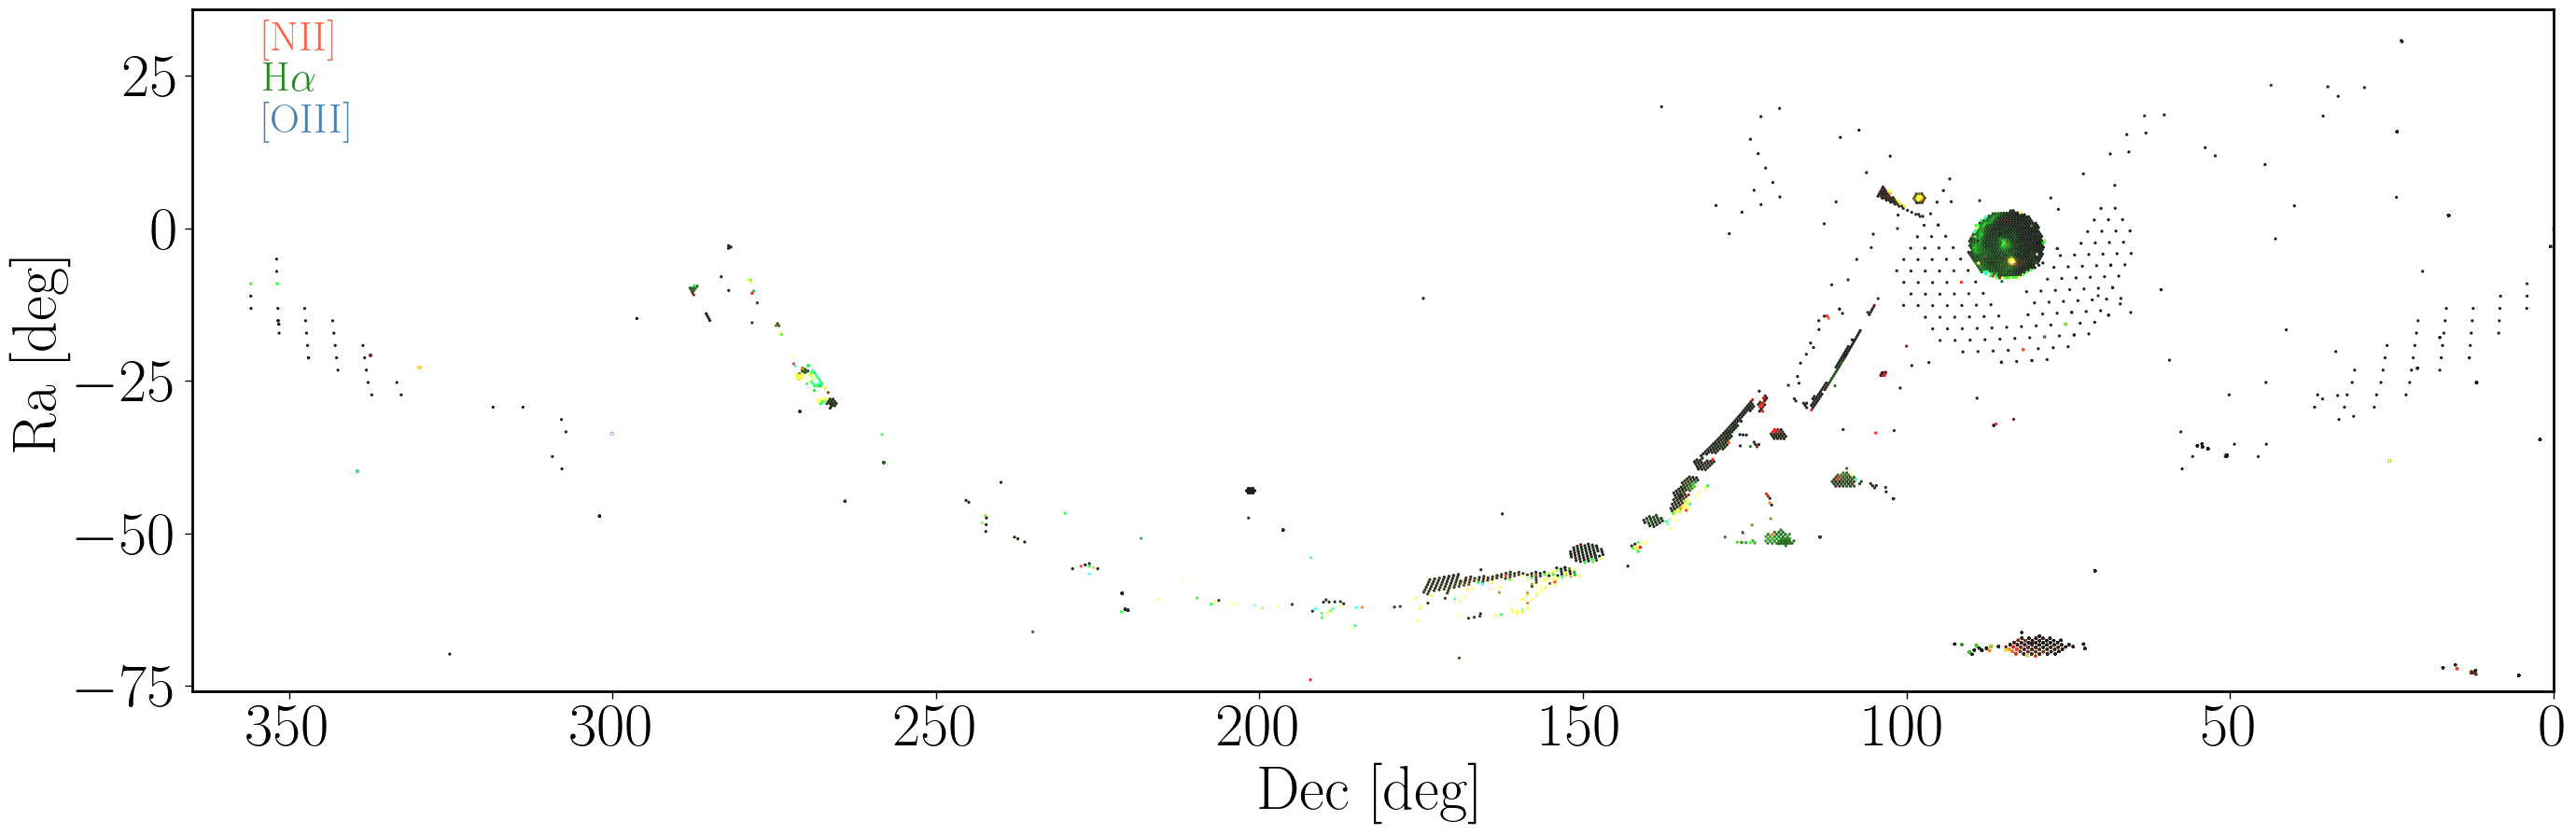

In [407]:
# 
x0 = 364.99
x1 = -0.01
dx = np.abs(x0-x1)
y0 = -75.9
y1 = 35.9
dy = np.abs(y0-y1)
x_scale = dx/dy
colors=map_plot_DAP_rgb(tab_DAP,rgb_scale = (0.1,0.5,4.5), \
                 vmin=-1000, vmax=8000, title=None, filename='all_LVM',\
                 fsize=10, figs_dir='figs',gamma=0.5,fig_type='pdf',\
                 x_scale=x_scale,marker='H',xx=np.array((x0,x1)),\
                 yy=np.array((y0,y1)),fs=2.5,sf=55,projection=None)#, galactic=True)


In [428]:
# 
x0 = 364.99
x1 = -0.01
dx = np.abs(x0-x1)
y0 = -75.9
y1 = 35.9
dy = np.abs(y0-y1)
x_scale = dx/dy
colors=map_plot_DAP_rgb(tab_DAP,rgb_scale = (0.1,0.5,4.5), \
                 vmin=-1000, vmax=8000, title=None, filename='all_LVM_big',\
                 fsize=60, figs_dir='figs',gamma=0.5,fig_type='pdf',\
                 x_scale=x_scale,marker='H',xx=np.array((x0,x1)),\
                 yy=np.array((y0,y1)),fs=2.5,sf=55,projection=None)#, galactic=True)


min/max:-1000/8000
-10.959999999999999 29.192


In [408]:
X= tab_DAP['ra'].value
Y= tab_DAP['dec'].value
#print(Y[Y>90])
c_icrs = SkyCoord(ra=X*u.degree, dec=Y*u.degree, frame='icrs')
X = c_icrs.galactic.l 
Y = c_icrs.galactic.b 

min/max:-1000/8000
-10.959999999999999 29.192


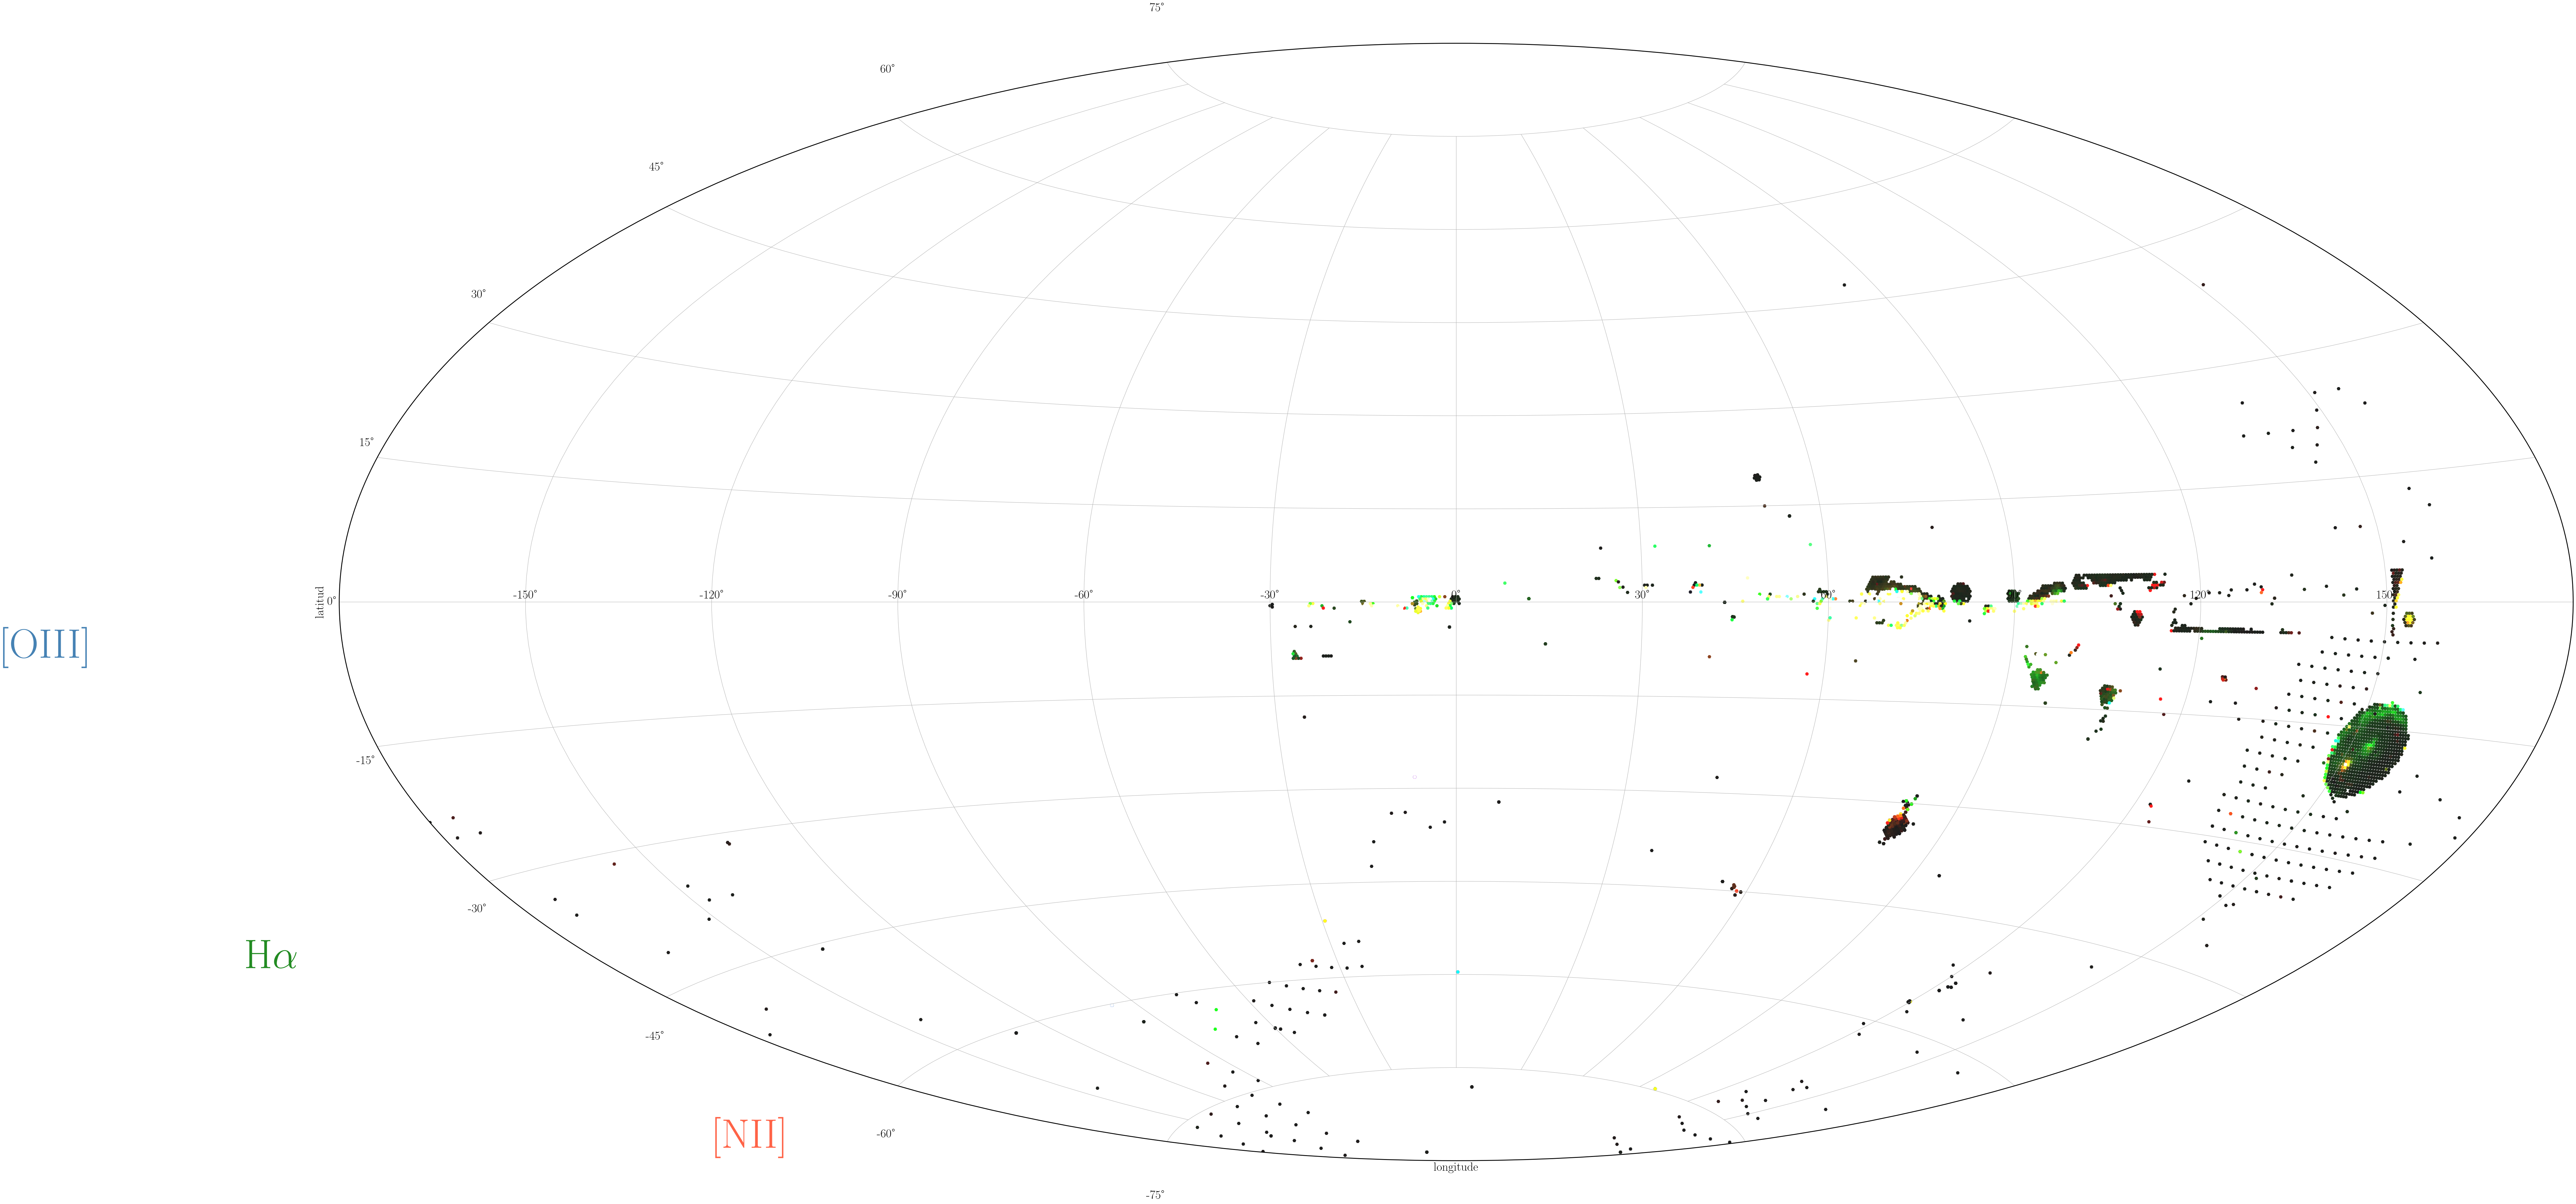

In [426]:
# 
x0 = 364.99
x1 = -0.01
dx = np.abs(x0-x1)
y0 = -75.9
y1 = 35.9
dy = np.abs(y0-y1)
x_scale = dx/dy
colors=map_plot_DAP_rgb(tab_DAP,rgb_scale = (0.1,0.5,4.5), \
                 vmin=-1000, vmax=8000, title=None, filename='all_LVM_gal',\
                 fsize=50, figs_dir='figs',gamma=0.5,fig_type='pdf',\
                 x_scale=x_scale,marker='H',xx=np.array((x0,x1)),\
                 yy=np.array((y0,y1)),fs=1.5,sf=1,\
                        projection='aitoff', galactic=True, x_label='longitude', y_label='latitud')


min/max:-100/1000
99.4 -15.9


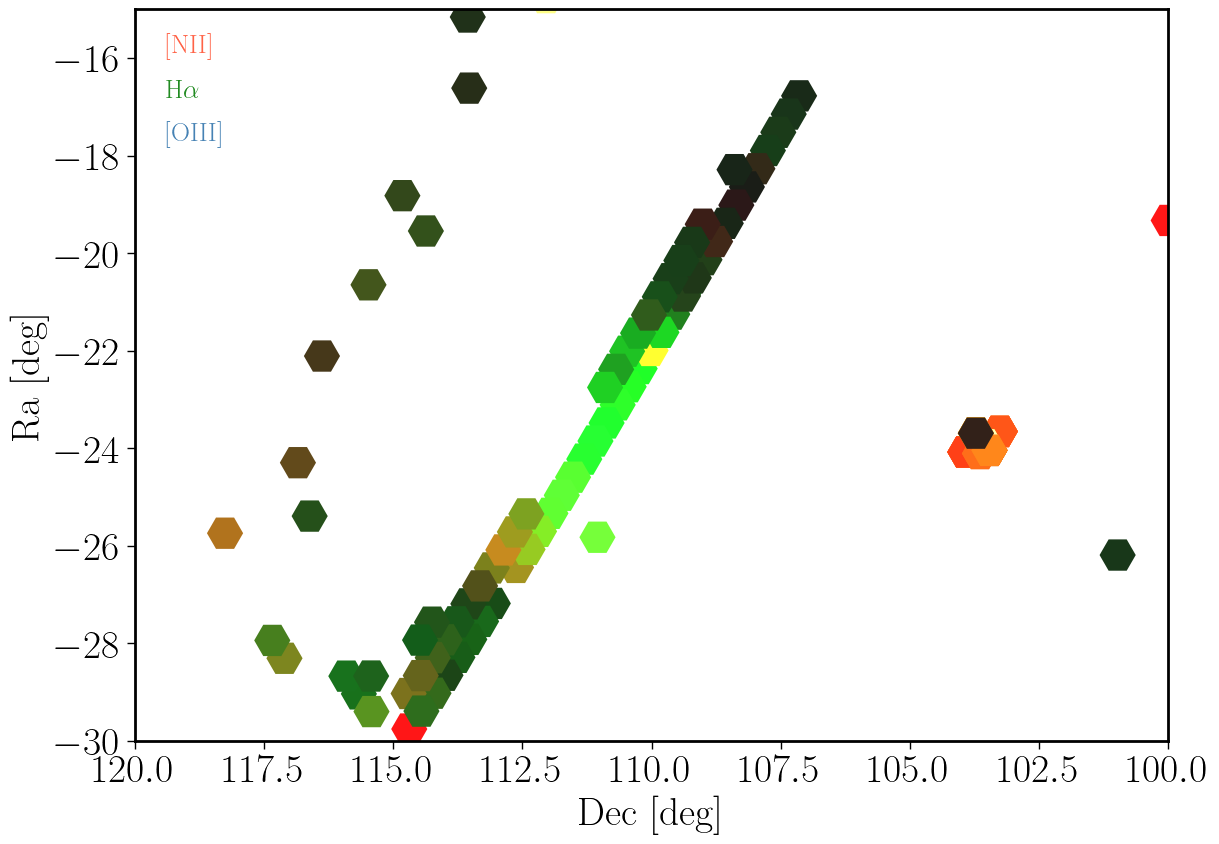

array([[0.9999999, 0.9999999, 0.9999999],
       [0.9999999, 0.9999999, 0.9999999],
       [0.9999999, 0.9999999, 0.9999999],
       ...,
       [0.9999999, 0.9999999, 0.9999999],
       [0.9999999, 0.9999999, 0.9999999],
       [0.9999999, 0.9999999, 0.9999999]])

In [411]:
# 
x0 = 120
x1 = 100
dx = np.abs(x0-x1)
y0 = -30
y1 = -15
dy = np.abs(y0-y1)
x_scale = dx/dy
map_plot_DAP_rgb(tab_DAP,rgb_scale = (0.1,0.5,4.5), \
                 vmin=-100, vmax=1000, title=None, filename='zoom00_LVM',\
                 fsize=10, figs_dir='figs',gamma=0.5,fig_type='pdf',\
                 x_scale=x_scale,marker='H',xx=np.array((x0,x1)),\
                 yy=np.array((y0,y1)),fs=1.5,sf=75,projection=None)


min/max:-100/1000
70.16 -65.54


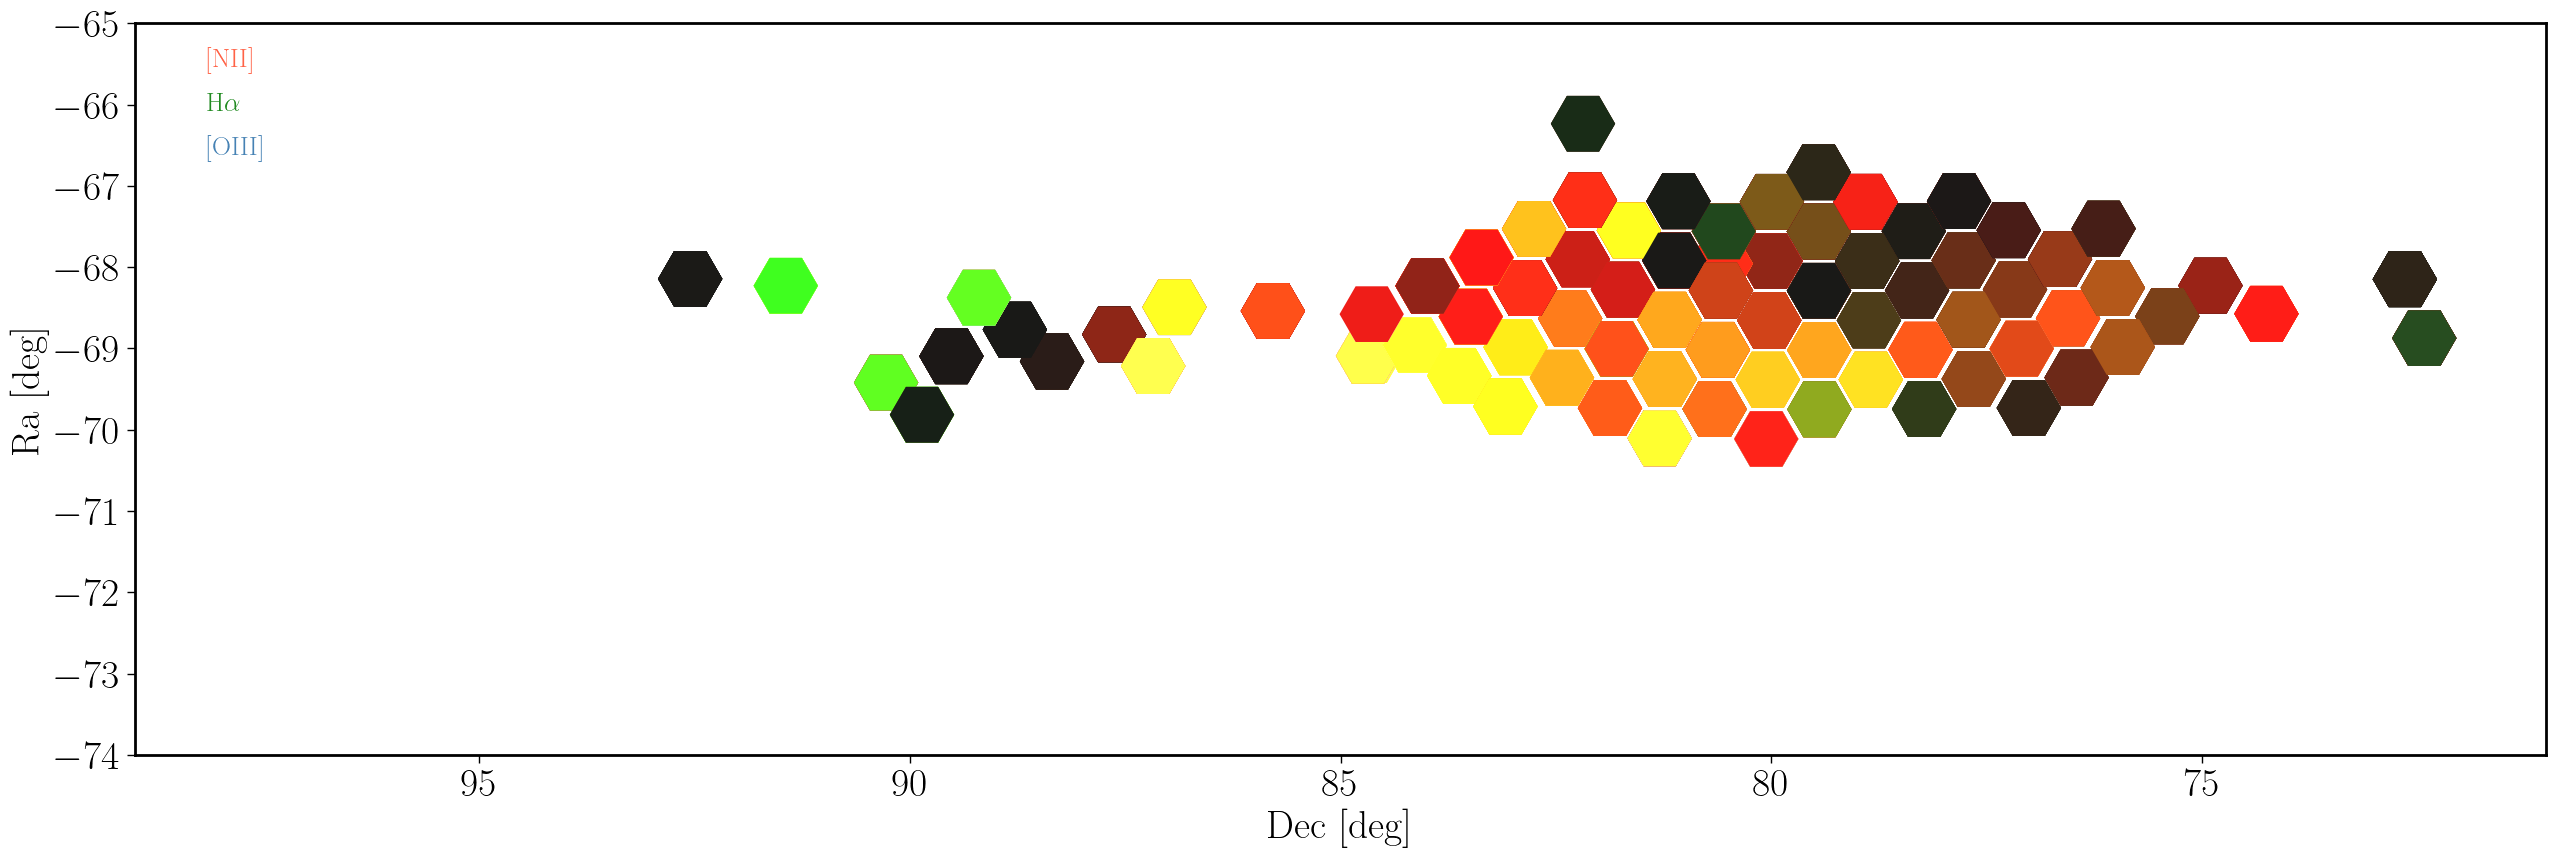

array([[0.9999999, 0.9999999, 0.9999999],
       [0.9999999, 0.9999999, 0.9999999],
       [0.9999999, 0.9999999, 0.9999999],
       ...,
       [0.9999999, 0.9999999, 0.9999999],
       [0.9999999, 0.9999999, 0.9999999],
       [0.9999999, 0.9999999, 0.9999999]])

In [412]:
# 
x0 = 99
x1 = 71
dx = np.abs(x0-x1)
y0 = -74
y1 = -65
dy = np.abs(y0-y1)
x_scale = dx/dy
map_plot_DAP_rgb(tab_DAP,rgb_scale = (0.1,0.5,4.5), \
                 vmin=-100, vmax=1000, title=None, filename='zoom0_LVM',\
                 fsize=10, figs_dir='figs',gamma=0.5,fig_type='pdf',\
                 x_scale=x_scale,marker='H',xx=np.array((x0,x1)),\
                 yy=np.array((y0,y1)),fs=1.5,sf=80,projection=None)


min/max:-1000/8000
65.83 16.72


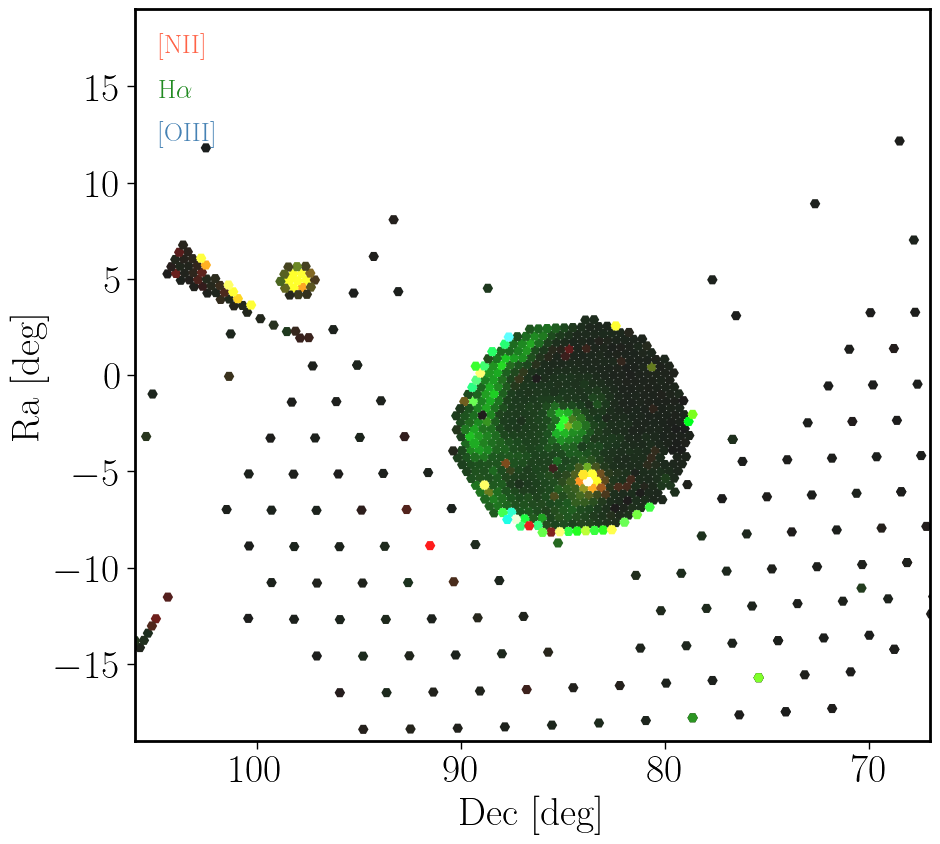

array([[0.9999999 , 0.9999999 , 0.9999999 ],
       [0.9999999 , 0.9999999 , 0.9999999 ],
       [0.9999999 , 0.9999999 , 0.9999999 ],
       ...,
       [0.9999999 , 0.9999999 , 0.28798986],
       [0.44006866, 0.9999999 , 0.25929073],
       [0.9999999 , 0.9999999 , 0.51366552]])

In [413]:
# 
x0 = 106
x1 = 67
dx = np.abs(x0-x1)
y0 = -19
y1 = 19
dy = np.abs(y0-y1)
x_scale = dx/dy
map_plot_DAP_rgb(tab_DAP,rgb_scale = (0.1,0.5,4.5), \
                 vmin=-1000, vmax=8000, title=None, filename='zoom1_LVM',\
                 fsize=10, figs_dir='figs',gamma=0.5,fig_type='pdf',\
                 x_scale=x_scale,marker='H',xx=np.array((x0,x1)),\
                 yy=np.array((y0,y1)),fs=1.5,sf=55,projection=None)


min/max:-1000/8000
77.095 3.2199999999999998


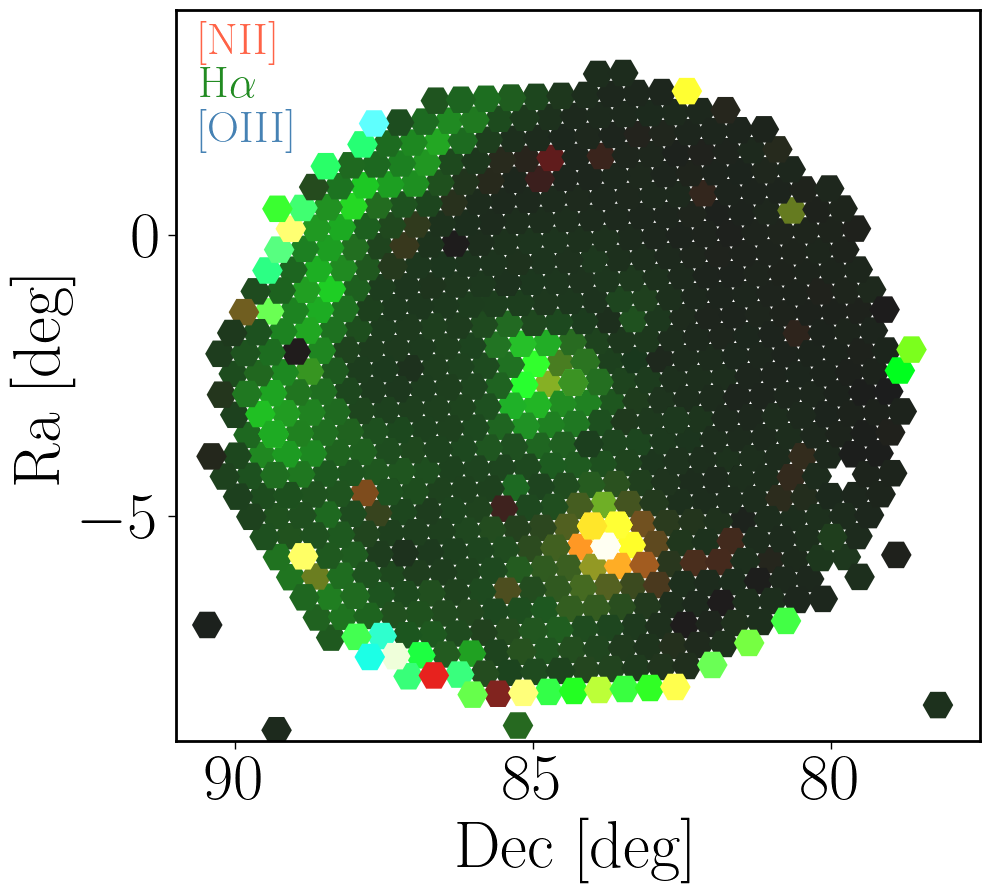

array([[0.9999999 , 0.9999999 , 0.9999999 ],
       [0.9999999 , 0.9999999 , 0.9999999 ],
       [0.9999999 , 0.9999999 , 0.9999999 ],
       ...,
       [0.9999999 , 0.9999999 , 0.28798986],
       [0.44006866, 0.9999999 , 0.25929073],
       [0.9999999 , 0.9999999 , 0.51366552]])

In [414]:
# 
x0 = 91
x1 = 77.5
dx = np.abs(x0-x1)
y0 = -9
y1 = 4
dy = np.abs(y0-y1)
x_scale = dx/dy
map_plot_DAP_rgb(tab_DAP,rgb_scale = (0.1,0.5,4.5),
                 vmin=-1000, vmax=8000, title=None, filename='zoom2_LVM',\
                 fsize=10, figs_dir='figs',gamma=0.5,fig_type='pdf',\
                 x_scale=x_scale,marker='H',xx=np.array((x0,x1)),\
                 yy=np.array((y0,y1)),fs=2.5,sf=55,projection=None)                 


In [415]:
def search_col(tab,key):
    a_keys=[]
    for keys in tab.columns:
        if (keys.find(key)>-1):
            print(keys)
            a_keys.append(keys)
    return a_keys

In [416]:
search_col(tab_DAP,'6300.3')

flux_[OI]_6300.3
vel_[OI]_6300.3
disp_[OI]_6300.3
EW_[OI]_6300.3
e_flux_[OI]_6300.3
e_vel_[OI]_6300.3
e_disp_[OI]_6300.3
e_EW_[OI]_6300.3
flux_pe_6300.3
e_flux_pe_6300.3
disp_pe_6300.3
e_disp_pe_6300.3
vel_pe_6300.3
e_vel_pe_6300.3


['flux_[OI]_6300.3',
 'vel_[OI]_6300.3',
 'disp_[OI]_6300.3',
 'EW_[OI]_6300.3',
 'e_flux_[OI]_6300.3',
 'e_vel_[OI]_6300.3',
 'e_disp_[OI]_6300.3',
 'e_EW_[OI]_6300.3',
 'flux_pe_6300.3',
 'e_flux_pe_6300.3',
 'disp_pe_6300.3',
 'e_disp_pe_6300.3',
 'vel_pe_6300.3',
 'e_vel_pe_6300.3']

/tmp/ipykernel_115117/3107335125.py:54: RuntimeWarning: invalid value encountered in log10
  O3=np.log10(OIII)-np.log10(Hb)
/tmp/ipykernel_115117/3107335125.py:55: RuntimeWarning: invalid value encountered in log10
  N2=np.log10(NII)-np.log10(Ha)
/tmp/ipykernel_115117/3107335125.py:56: RuntimeWarning: invalid value encountered in log10
  S2=np.log10(SII/Ha)
/tmp/ipykernel_115117/3107335125.py:57: RuntimeWarning: invalid value encountered in log10
  O1=np.log10(OI/Ha)
/tmp/ipykernel_115117/3107335125.py:58: RuntimeWarning: divide by zero encountered in log10
  lEW_Ha = np.log10(np.abs(tab_DAP['EW_Halpha_6562.85']))
/tmp/ipykernel_115117/3107335125.py:59: RuntimeWarning: divide by zero encountered in divide
  e_lEW_Ha = 0.4*np.abs(tab_DAP['e_EW_Halpha_6562.85']/tab_DAP['EW_Halpha_6562.85'])
/tmp/ipykernel_115117/3107335125.py:81: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[na

(4276,)
(4276,)


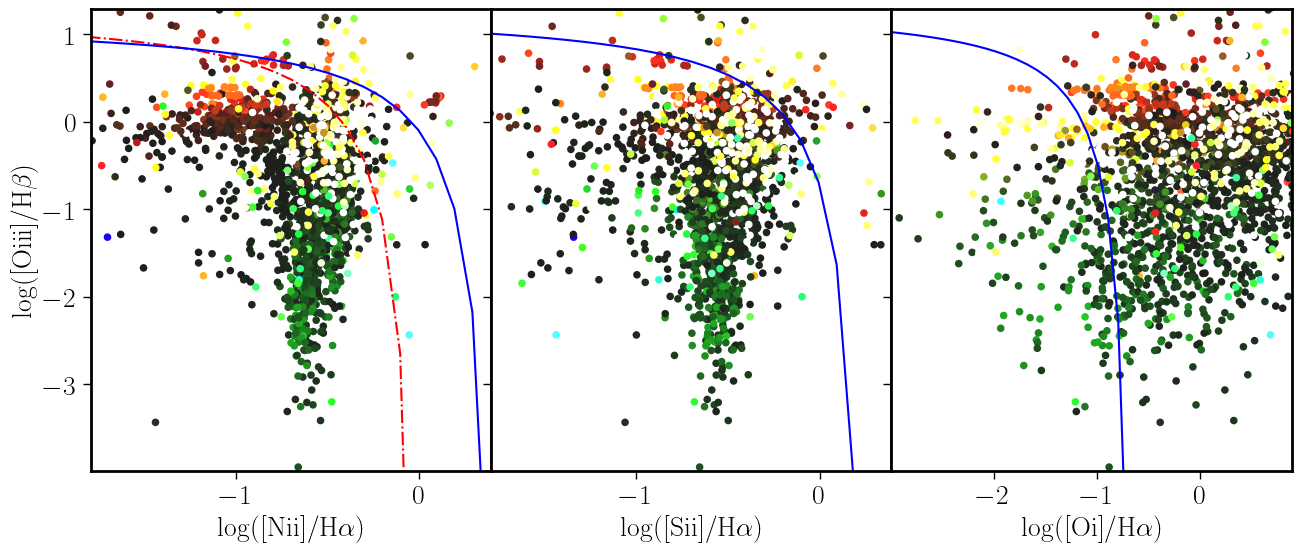

In [417]:
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


mask_Ha = (tab_DAP['flux_Halpha_6562.85']>100) & (tab_DAP['flux_Halpha_6562.85']>3.0*tab_DAP['e_flux_Halpha_6562.85'])



Ha=tab_DAP['flux_Halpha_6562.85']
Hb=tab_DAP['flux_Hbeta_4861.36']
OIII=tab_DAP['flux_[OIII]_5006.84']
NII=tab_DAP['flux_[NII]_6583.45']
SII=tab_DAP['flux_[SII]_6716.44']+tab_DAP['flux_[SII]_6730.82']
OI=tab_DAP['flux_pe_6300.3']#['flux_[OI]_6300.3']
#tab_DAP['flux_pe_3726.03']+tab_DAP['flux_pe_3728.82']

map_dist=np.arange(len(Ha))

eHa=tab_DAP['e_flux_Halpha_6562.85']
eHb=tab_DAP['e_flux_Hbeta_4861.36']
eOIII=tab_DAP['e_flux_[OIII]_5006.84']
eNII=tab_DAP['e_flux_[NII]_6583.45']
eSII=np.sqrt(tab_DAP['e_flux_[SII]_6716.44']**2+tab_DAP['e_flux_[SII]_6730.82']**2)
eOI=tab_DAP['flux_[OI]_6300.3']
#tab_DAP['e_flux_pe_3726.03']+tab_DAP['e_flux_pe_3728.82']

#tab_DAP['e_flux_pe_9531.1']

O3=np.log10(OIII)-np.log10(Hb)
N2=np.log10(NII)-np.log10(Ha)
S2=np.log10(SII/Ha)
O1=np.log10(OI/Ha)
lEW_Ha = np.log10(np.abs(tab_DAP['EW_Halpha_6562.85']))
e_lEW_Ha = 0.4*np.abs(tab_DAP['e_EW_Halpha_6562.85']/tab_DAP['EW_Halpha_6562.85'])
nx = 2.5 #np.max(tab_DAP[mask_Ha]['R_Re'])
#
#
#
fig, axes = plt.subplots(1,3,figsize=(15.5,6), sharey=True, squeeze=False)
x_min1=-1.79
x_max1=0.39
y_min1=-3.99
y_max1=1.29

x=np.linspace(5*x_min1,2*x_max1,100)
cut_y=-0.7+0.2-3.67*x
cut_y2=-1.7+0.5-3.67*x
cut_y3=0.61/(x-0.05)+1.3
cut_y4=0.61/(x-0.47)+1.19
cut_y_SII=0.61/(x-0.3)+1.3;
cut_y_SII=0.61/(x-0.3)+1.3;
cut_y_SII_AGNs=1.89*(x)+0.76;
cut_y_OI=0.73/((x+0.59))+1.33;#+1.10;
cut_y_OI_AGNs=1.18*(x)+1.30;
cut_y_OIII_AGNs=1.14*(x)+0.36;
cm = plt.cm.get_cmap('viridis')
print(mask_Ha.shape)
print(N2.shape)

cax1=axes[0,0].scatter(N2[mask_Ha],O3[mask_Ha],color=colors[mask_Ha],edgecolor='None',s=30)
#                       c=map_dist[mask_Ha], marker='o', s=30, alpha=0.35, cmap=cm, vmin=0, vmax=nx)
cax2=axes[0,1].scatter(S2[mask_Ha],O3[mask_Ha],color=colors[mask_Ha],edgecolor='None',s=30)
cax3=axes[0,2].scatter(O1[mask_Ha],O3[mask_Ha],color=colors[mask_Ha],edgecolor='None',s=30)

#axes[0,0].scatter(N2,O3,alpha=0.75, marker='*', s=100,c='green')
#axes[0,1].scatter(S2,O3,alpha=0.75, marker='*', s=100,c='green')
#axes[0,2].scatter(O1,O3,alpha=0.75, marker='*', s=100,c='green')

axes[0,0].plot(x[x<0],cut_y3[x<0],'r-.')
axes[0,0].plot(x,cut_y4,'b-')
axes[0,1].plot(x[x<0.2],cut_y_SII[x<0.2],'b-')
axes[0,2].plot(x[x<-0.6],cut_y_OI[x<-0.6],'b-')


#plt.rcParams.update({'font.size': 16})
axes[0,0].set_ylabel(r'log([Oiii]/H$\beta$)')
axes[0,0].set_xlabel(r'log([Nii]/H$\alpha$)')
axes[0,1].set_xlabel(r'log([Sii]/H$\alpha$)')
axes[0,2].set_xlabel(r'log([Oi]/H$\alpha$)')
axes[0,0].set_xlim(x_min1,x_max1)
axes[0,1].set_xlim(x_min1,x_max1)
axes[0,2].set_xlim(x_min1-1.2,x_max1+0.5)
axes[0,0].set_ylim(y_min1,y_max1)




plt.subplots_adjust(wspace=0)

plt.tight_layout
fig.savefig(f'figs/BPT_all_LVM.png', facecolor='white')
plt.show()

#cax1=axes[0,2].scatter(N2[mask_Ha],O3[mask_Ha],c=log_EW_Ha[mask_Ha], marker='o', s=30, alpha=0.35, cmap=cm, vmin=-3, vmax=2.5)
#axes[0,2].plot(x[x<0],cut_y3[x<0],'r-.')
#axes[0,2].plot(x,cut_y4,'b-')
#cb1=add_colorbar(cax1)
#cb1.set_label(r'$log|EW(H\alpha)|$')

vel_Halpha_6562.85 -50 150


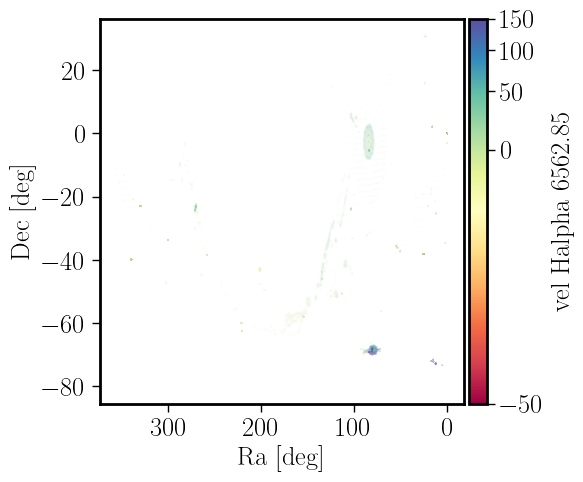

In [418]:
#flux_[OIII]_4363.21
map_plot_DAP(tab_DAP,line='vel_Halpha_6562.85', \
                 vmin=-50, vmax=150, title=None, filename='junk',\
             cmap='Spectral', fsize=5, figs_dir='figs',gamma=0.3,fig_type='pdf')

In [419]:
print(mask_Ha.shape)
print(N2.shape)
print(N2[mask_Ha])

(4276,)
(4276,)
 flux_[NII]_6583.45 
--------------------
 -0.3471817306493783
 -0.3723716382316411
 -0.3838946891062278
 -0.3780203386184553
 -0.3288568821218121
 -0.3689516554153194
-0.35765174799733757
-0.35050287226426136
-0.32784818583200703
-0.35063120125457914
                 ...
-0.13270636566848015
-0.14499861518132917
-0.20271954389058955
                 nan
 -0.6076265294717573
 -1.0412357687804907
-0.47667630737290523
-0.45640344259252785
 -0.1525689890549815
-0.40859736337587194
Length = 2918 rows


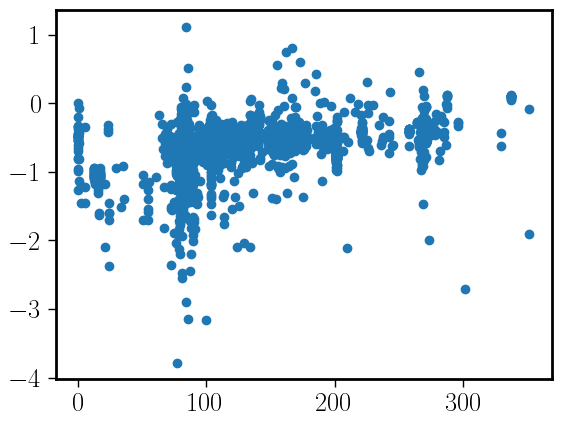

In [420]:
plt.scatter(tab_DAP['ra'][mask_Ha],N2[mask_Ha])

min/max:-1.4842826162944446e+19/3.370918074995797e+21
385.44979990953203 28.960550709146084


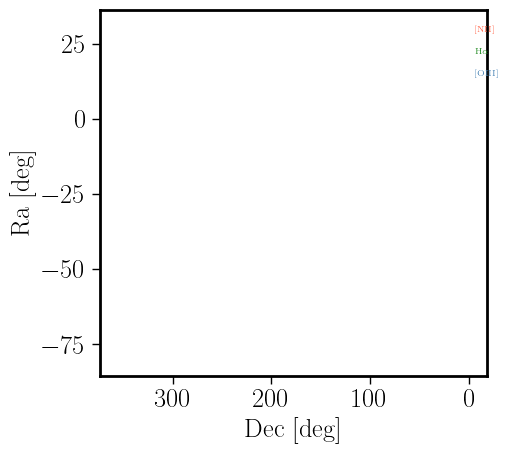

array([[0.00441472, 0.00649308, 0.00702644],
       [0.00556563, 0.0272814 , 0.03151345],
       [0.00444623, 0.00540394, 0.00556651],
       ...,
       [0.0043839 , 0.0043839 , 0.0043839 ],
       [0.0043839 , 0.0043839 , 0.0043839 ],
       [0.0043839 , 0.0043839 , 0.0043839 ]])

In [421]:
 map_plot_DAP_rgb(tab_DAP, \
                 rgb_scale = (3,1,1.5), \
                 vmin=0, vmax=0, title=r'[OIII],H$\alpha$,[NII]', filename='junk',\
                 fsize=5, figs_dir='figs',gamma=0.5,fig_type='pdf')

min/max:-4.581937556747543e+19/3.370918074995797e+21
385.44979990953203 28.960550709146084


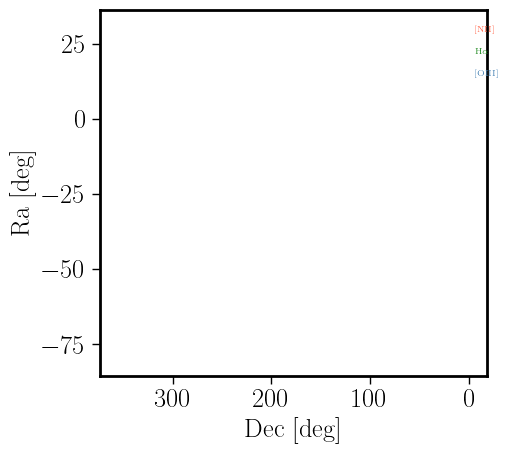

array([[0.01550033, 0.01428313, 0.01384664],
       [0.03610018, 0.02237147, 0.01728098],
       [0.01442107, 0.0138009 , 0.01351188],
       ...,
       [0.01341027, 0.01341027, 0.01341027],
       [0.01341027, 0.01341027, 0.01341027],
       [0.01341027, 0.01341027, 0.01341027]])

In [422]:
map_plot_DAP_rgb(tab_DAP, rgb_key=('flux_pe_6730.82','flux_pe_6583.45','flux_pe_6562.85'),\
                 vmin=0, vmax=0, title=None, filename='junk',\
                 fsize=5, figs_dir='figs',gamma=0.5,fig_type='pdf')

min/max:-6.973206695570203e+21/3.370918074995797e+21
385.44979990953203 28.960550709146084


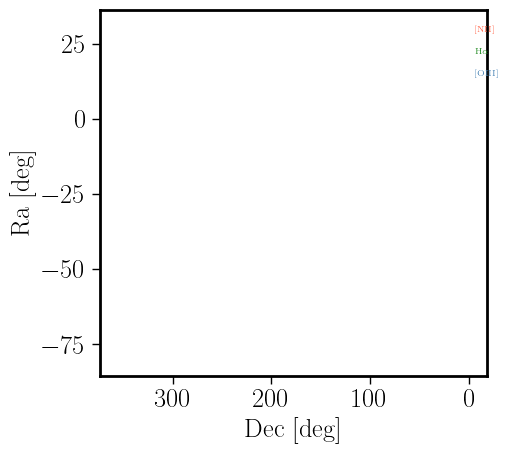

array([[0.67412917, 0.67481281, 0.67412245],
       [0.67438031, 0.68161708, 0.67412245],
       [0.67413605, 0.67445632, 0.67412245],
       ...,
       [0.67412245, 0.67412245, 0.67412245],
       [0.67412245, 0.67412245, 0.67412245],
       [0.67412245, 0.67412245, 0.67412245]])

In [423]:
# flux_pe_9531.1 
map_plot_DAP_rgb(tab_DAP, rgb_key=('flux_pe_9531.1','flux_pe_6562.85','flux_pe_5006.84'),\
                 vmin=0, vmax=0, title=None, filename='junk',\
                 fsize=5, figs_dir='figs',gamma=0.5,fig_type='pdf')


min/max:126.7474/73873.2242


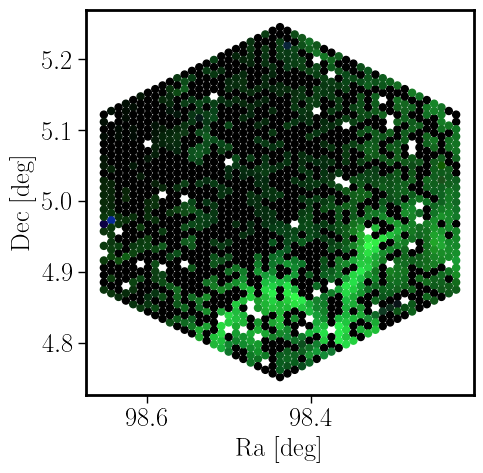

In [25]:
map_plot_DAP_rgb(tab_DAP, rgb_key=('flux_pe_9531.1','flux_pe_6562.85','flux_pe_3726.03'),\
                 vmin=0, vmax=0, title=None, filename='junk',\
                 fsize=5, figs_dir='figs',gamma=0.5,fig_type='pdf')

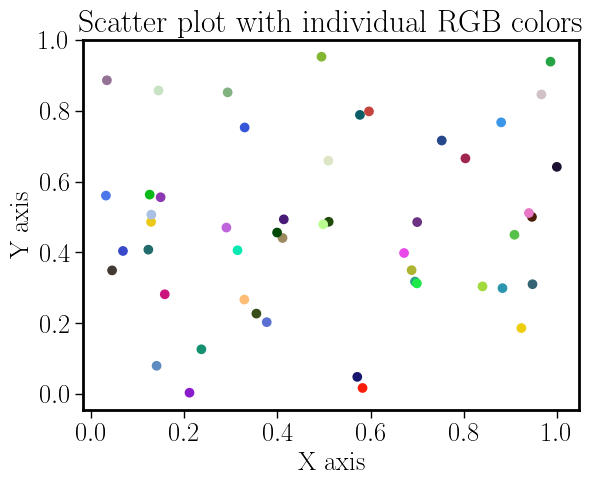

[[0.68223142 0.70538359 0.18680814]
 [0.28125532 0.10267441 0.47121593]
 [0.04169037 0.36489549 0.40417993]
 [0.12327803 0.29303377 0.04500327]
 [0.20790702 0.33141275 0.84831811]
 [0.60745768 0.54219563 0.37821429]
 [0.08877776 0.08689398 0.43626368]
 [0.16484331 0.59194003 0.68216101]
 [0.98623122 0.11479073 0.03909241]
 [0.20740432 0.39051272 0.45891287]
 [0.26470217 0.22280639 0.20052817]
 [0.14817758 0.64220243 0.26718047]
 [0.03962829 0.72682294 0.08902627]
 [0.73088992 0.99934702 0.56591567]
 [0.22027036 0.30173266 0.09498274]
 [0.93358072 0.80412882 0.05779066]
 [0.42321346 0.19134764 0.51131167]
 [0.74380344 0.39732522 0.85805476]
 [0.2999262  0.46540368 0.91666088]
 [0.6183093  0.14748351 0.31216848]
 [0.77250411 0.26338443 0.23876451]
 [0.35525536 0.43468248 0.82168585]
 [0.33823343 0.75665545 0.28556188]
 [0.29579909 0.12195792 0.02648265]
 [0.15946446 0.63945216 0.52177149]
 [0.03216493 0.9117953  0.70706783]
 [0.14359566 0.27808549 0.54346515]
 [0.86281223 0.89895278 0.77

In [14]:
x = np.random.rand(50)  # 50 x-coordinates
y = np.random.rand(50)  # 50 y-coordinates

# RGB components
r = np.random.rand(50)  # Red component
g = np.random.rand(50)  # Green component
b = np.random.rand(50)  # Blue component

# Combine the RGB components into a single array
colors = np.stack((r, g, b), axis=1)

# Plotting
plt.scatter(x, y, color=colors)
plt.title('Scatter plot with individual RGB colors')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

print(colors)

flux_Halpha_6562.85 -1.709673167226934e+18 3.337025037084563e+19


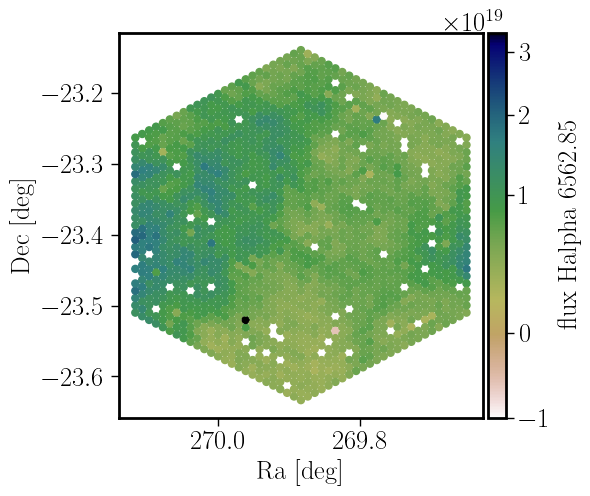

In [15]:
#tab_DAP['junk']=1.5*tab_DAP['flux_Halpha_6562.85']
map_plot_DAP(tab_DAP,line='flux_Halpha_6562.85', \
                 vmin=0, vmax=0, title=None, filename='junk',\
             cmap='gist_earth_r', fsize=5, figs_dir='figs',gamma=0.5,fig_type='pdf')

# 